In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("reddit.csv")

In [4]:
data.shape

(37249, 2)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37249 entries, 0 to 37248
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   clean_comment  37149 non-null  object
 1   category       37249 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 582.1+ KB


In [6]:
data.sample()["clean_comment"].values

array(['bullish resignations but india does keep disappointing'],
      dtype=object)

In [7]:
data.isnull().sum()

,0
clean_comment,100
category,0


In [8]:
data[data["clean_comment"].isna()]

,clean_comment,category
413,NaN,0
605,NaN,0
2422,NaN,0
2877,NaN,0
3307,NaN,0
...,...,...
35975,NaN,0
36036,NaN,0
37043,NaN,0
37111,NaN,0


In [9]:
data=data.dropna()

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37149 entries, 0 to 37248
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   clean_comment  37149 non-null  object
 1   category       37149 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 870.7+ KB


In [11]:
data.duplicated().sum()

np.int64(350)

In [12]:
data.drop_duplicates(inplace=True)

In [13]:
data.duplicated().sum()

np.int64(0)

In [14]:
data[(data["clean_comment"].str.strip()=='')]

,clean_comment,category
181,,0
4432,\n,0
10592,,0
16173,,0
32149,\n,0
34959,,0


In [15]:
data= data[~(data["clean_comment"].str.strip()=='')]

In [16]:
data.shape

(36793, 2)

In [17]:
data["clean_comment"]= data["clean_comment"].str.lower()

In [18]:
data.head()

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [19]:
data[data["clean_comment"].apply(lambda x:x.startswith(" ") or x.endswith(" ") )]

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1
...,...,...
37241,let the janta decide not ulema clerics,0
37242,hona hai same with vaccination education insu...,0
37246,downvote karna tha par upvote hogaya,0
37247,haha nice,1


In [20]:
data[data["clean_comment"].apply(lambda x : x.startswith(" ")or x.endswith(" "))]

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1
...,...,...
37241,let the janta decide not ulema clerics,0
37242,hona hai same with vaccination education insu...,0
37246,downvote karna tha par upvote hogaya,0
37247,haha nice,1


In [21]:
data["clean_comment"]= data["clean_comment"].str.strip()

In [22]:
data[data["clean_comment"].apply(lambda x : x.startswith(" ")or x.endswith(" "))]

,clean_comment,category


In [23]:
data[data["clean_comment"].str.contains(r'http[s]?://|www\.', regex=True, na=False)]


,clean_comment,category


In [24]:
data[data["clean_comment"].str.contains("\n")]

,clean_comment,category
448,what missing jpg\nand why this brilliant edit ...,1
781,india has been ruined congress and populist sc...,-1
847,like aap for its stand corruption and making p...,-1
871,reduced trade\ndeficit stronger rupee aren the...,0
1354,amsa press conference australian maritime safe...,1
...,...,...
35128,火箭o辛基 2016 sughosh bansal mission “make india”...,-1
35230,yikes the title should blind bhakts modi hater...,1
36187,hahahahahhahahah \niska klpd hogya,0
36517,्ा् ी ाी े ो ेी ाी े।\nे ी,0


In [25]:
data["clean_comment"]= data["clean_comment"].str.replace("\n", " " , regex=True)

In [26]:
data[data["clean_comment"].str.contains("\n")]

,clean_comment,category


<Axes: xlabel='category', ylabel='count'>

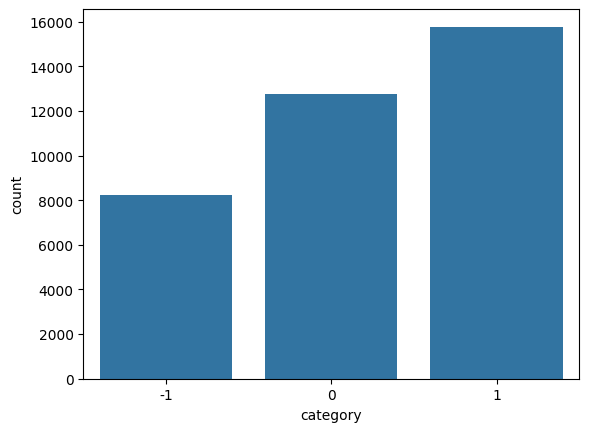

In [27]:
sns.countplot(data=data, x = "category")

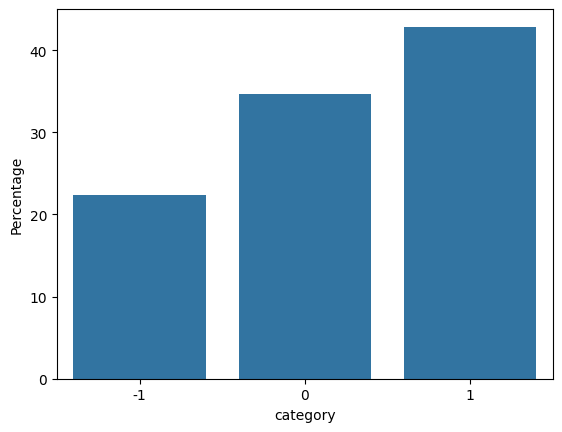

In [28]:
category_perc = data["category"].value_counts(normalize=True) * 100
sns.barplot(x=category_perc.index, y=category_perc.values)
plt.ylabel("Percentage")
plt.show()

In [29]:
data["word_count"]= data["clean_comment"].apply(lambda x : len(x.split(" ")))

In [30]:
data.head()

,clean_comment,category,word_count
0,family mormon have never tried explain them th...,1,39
1,buddhism has very much lot compatible with chr...,1,196
2,seriously don say thing first all they won get...,-1,86
3,what you have learned yours and only yours wha...,0,29
4,for your own benefit you may want read living ...,1,112


In [31]:
data["word_count"].describe()

,word_count
count,36793.000000
mean,29.668497
std,56.786439
min,1.000000
25%,6.000000
50%,13.000000
75%,30.000000
max,1307.000000


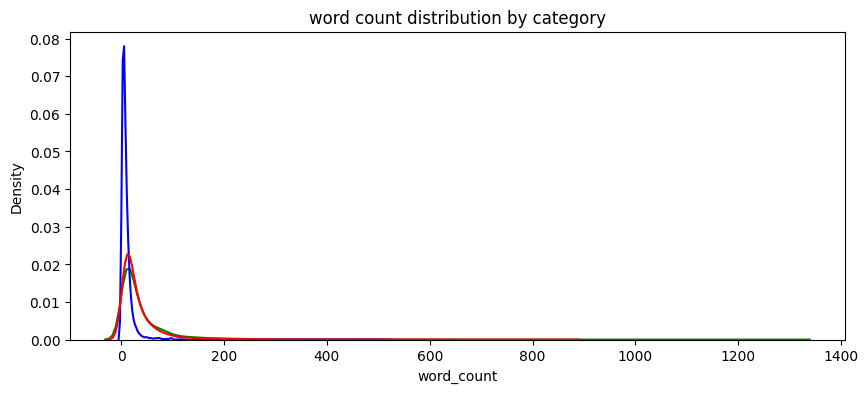

In [32]:
plt.figure(figsize=(10,4))

sns.kdeplot(data[data["category"]==1]["word_count"], label = "Positive", fill = False , color = "green")
sns.kdeplot(data[data["category"]==0]["word_count"], label = "Neutral", fill = False , color = "blue")
sns.kdeplot(data[data["category"]==-1]["word_count"], label = "Negative", fill = False , color = "red")
plt.title("word count distribution by category")

plt.show()


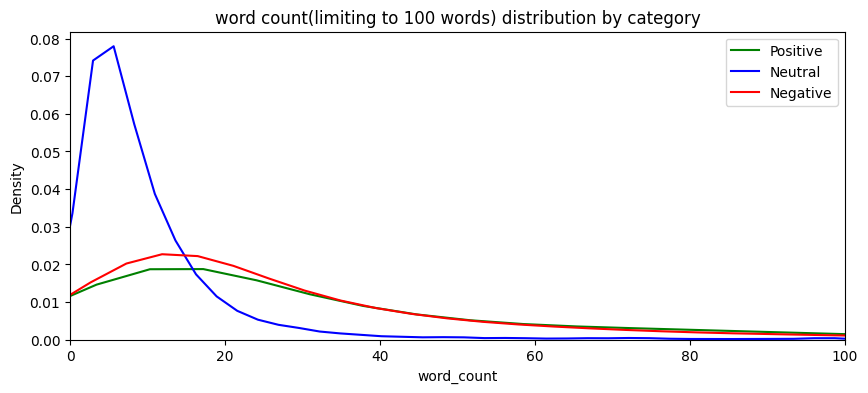

In [33]:
plt.figure(figsize=(10,4))

sns.kdeplot(data[data["category"]==1]["word_count"], label = "Positive", fill=False, color="green")
sns.kdeplot(data[data["category"]==0]["word_count"], label = "Neutral", fill=False, color="blue")
sns.kdeplot(data[data["category"]==-1]["word_count"], label = "Negative", fill=False, color="red")
plt.title("word count(limiting to 100 words) distribution by category")

plt.xlim(0, 100)
plt.legend()
plt.show()


<Axes: ylabel='word_count'>

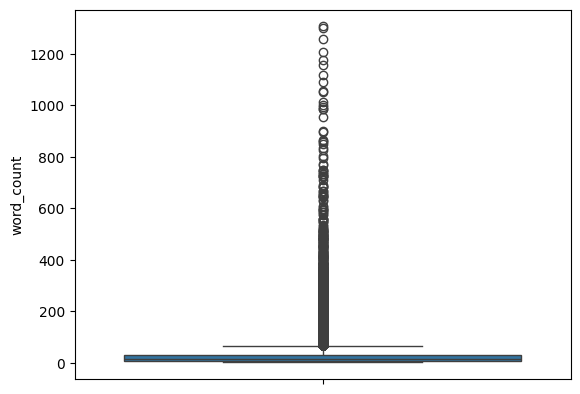

In [34]:
sns.boxplot(data["word_count"])

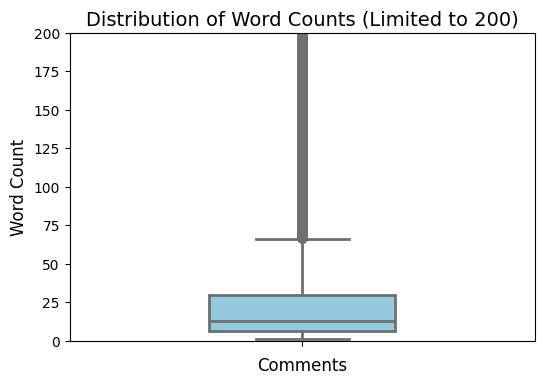

In [38]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))

sns.boxplot(
    data["word_count"],
    width=0.4,
    linewidth=2,
    color="skyblue"
)

plt.ylim(0, 200)

plt.title("Distribution of Word Counts (Limited to 200)", fontsize=14)
plt.xlabel("Comments", fontsize=12)
plt.ylabel("Word Count", fontsize=12)


plt.show()


/tmp/ipython-input-3230693331.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


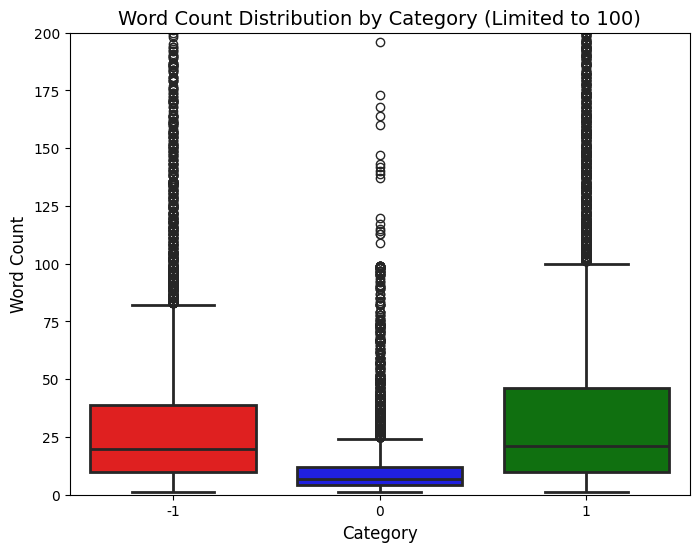

In [41]:
plt.figure(figsize=(8,6))

sns.boxplot(
    data=data,
    x="category",           # categories (Positive, Neutral, Negative)
    y="word_count",         # word count distribution
    linewidth=2,
    palette={"1": "green", "0": "blue", "-1": "red"}
)

plt.ylim(0, 200)   # limit to 100 words

# Labels and title
plt.title("Word Count Distribution by Category (Limited to 100)", fontsize=14)
plt.xlabel("Category", fontsize=12)
plt.ylabel("Word Count", fontsize=12)

plt.show()
